In [10]:
import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

In [17]:
source_path = r"K:\Research Data\Research Data Storage (BEAR-RDS)\2017\gokhalkm-dexter-aces\Nissy\GBVDepressionIllinv120240406052514\GBVDepressionIllinv120240406052514.csv"
columns = ['EXPOSED', 'O.M.DEPRESSION_BIRM_GBV:0', 'O.M.PY.DEPRESSION_BIRM_GBV:0']
df_base = pd.read_csv(source_path, usecols=columns)

In [18]:
print(len(df_base))

2540316


In [19]:
df_base.head(5)

,EXPOSED,O.M.DEPRESSION_BIRM_GBV:0,O.M.PY.DEPRESSION_BIRM_GBV:0
0,1,0,0.13142
1,0,0,14.42026
2,1,0,11.40589
3,0,0,13.63176
4,0,0,7.16769


In [20]:
df_base.shape

(2540316, 3)

In [21]:
df_base.dtypes

EXPOSED                           int64
O.M.DEPRESSION_BIRM_GBV:0         int64
O.M.PY.DEPRESSION_BIRM_GBV:0    float64
dtype: object

In [23]:
df_base.dropna(inplace=True)

In [24]:
df_base.isnull().sum()

EXPOSED                         0
O.M.DEPRESSION_BIRM_GBV:0       0
O.M.PY.DEPRESSION_BIRM_GBV:0    0
dtype: int64

In [25]:
cph = CoxPHFitter()
cph.fit(df_base, duration_col='O.M.PY.DEPRESSION_BIRM_GBV:0', event_col='O.M.DEPRESSION_BIRM_GBV:0', formula='EXPOSED')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 2.54032e+06 total observations, 2.26637e+06 right-censored observations>
             duration col = 'O.M.PY.DEPRESSION_BIRM_GBV:0'
                event col = 'O.M.DEPRESSION_BIRM_GBV:0'
      baseline estimation = breslow
   number of observations = 2.54032e+06
number of events observed = 273945
   partial log-likelihood = -3819239.78
         time fit was run = 2024-11-18 18:05:24 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
EXPOSED    1.13      3.10      0.00            1.12            1.14                3.08                3.12

           cmp to      z      p  -log2(p)
covariate                                
EXPOSED      0.00 293.65 <0.005       inf
---
Concordance = 0.64
Partial AIC = 7638481.56
log-likelihood ratio test = 79145.13 on 1 df
-log2(p) of ll-ratio test = inf

<Axes: xlabel='log(HR) (95% CI)'>

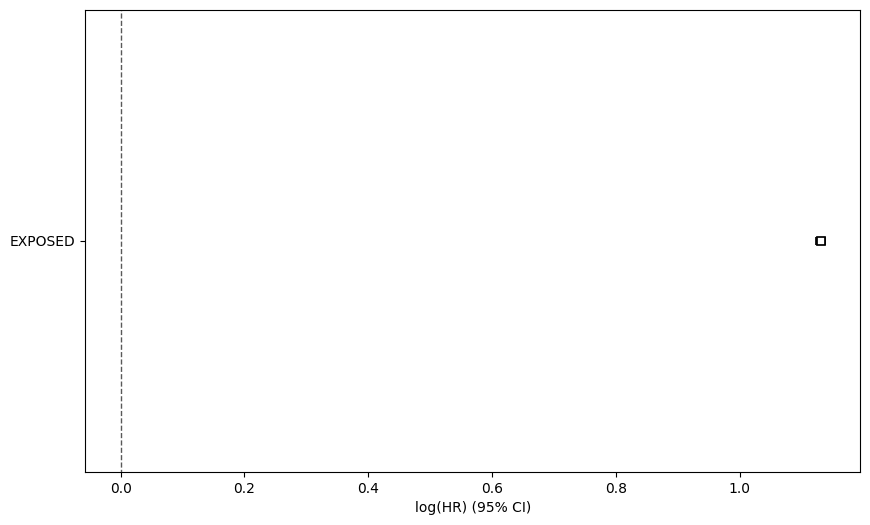

In [26]:
plt.subplots(figsize = (10, 6))
cph.plot()

In [28]:
cph.check_assumptions(df_base, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 2.54032e+06 total observations, 2.26637e+06 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic      p  -log2(p)
EXPOSED km           4316.27 <0.005       inf
        rank         5660.76 <0.005       inf



1. Variable 'EXPOSED' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['EXPOSED', ...]` in the call
in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[]